# Задача языкового моделирования

Студента отчислили за...

АКОС 0.5

Алгосы 0.2

Теорвер 0.3 $= P(\text{теорвер} | \text{за}, \text{отчислили}, \text{студента})$

$$P(w_0, \dots, w_n) = \Pi_{i=0}^nP(w_i|w_{i-1}, \dots, w_0)$$
$$\log P(w_0, \dots, w_n)= \log \Pi_{i=0}^nP(w_i|w_{i-1}, \dots, w_0) =∑_{i=0}^n \log P(w_i|w_{i-1}, \dots, w_0) $$
$$PP(w)=\sqrt[n]{\frac{1}{ \Pi_{i=0}^nP(w_i|w_{i-1}, \dots, w_0)}}=\exp \left(-\frac{1}{n}∑_{i=0}^n \log P(w_i|w_{i-1}, \dots, w_0) \right)$$

чем ниже перплексия, тем лучше

N-граммы - последовательности токенов длины N

N=1: униграммы

N=2: биграммы

N=3: триграммы

Замечание: обычно используется $N \leq 5$

GREEDY - на каждом шаге выбираем наиболее вероятный токен

$O(n)$

BEAM Search - на каждом шаге выбираем $k$ наиболее вероятных вариантов

$O(kn)$

**Студент 0.3**

**Студентка 0.3**

Преподаватель 0.2

Администрация 0.2

**Студент**

**отчислен** 0.5

переведен 0.3

взял 0.2

**Студентка**

**отчислена** 0.5

переведена 0.3

взяла 0.2

**Студент отчислен за**

**АКОС** 0.5

**Алгосы** 0.5

Студентка отчислена за

АКОС 0.3

Алгосы 0.3

Теорвер 0.4

Проблемы:

- затухающие градиенты
- взрывающиеся градиенты (gradient clipping)

Long Short Term Memory (LSTM)

+ память


Gated Recurrent Units

In [ ]:
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 MB 15.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 9.8 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.31.0
    Uninstalling requests-2.31.0:
      Successfully uninstalled requests-2.31.0
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4

In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader

import numpy as np
import matplotlib.pyplot as plt

from tqdm.auto import tqdm
from datasets import load_dataset
from nltk.tokenize import sent_tokenize
from sklearn.model_selection import train_test_split
import nltk

from collections import Counter
from typing import List

import seaborn
seaborn.set(palette='summer')



In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [ ]:
dataset = load_dataset('IlyaGusev/gazeta', revision='v1.0')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


The repository for IlyaGusev/gazeta contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/IlyaGusev/gazeta.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N] y


Generating train split:   0%|          | 0/52400 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/5770 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/5265 [00:00<?, ? examples/s]

In [ ]:
sents = []
for sent in tqdm(dataset['validation']['text']):
  sents.extend(
      [x.lower() for x in sent_tokenize(sent, language='russian') if len(x) < 256]
  )

  0%|          | 0/5265 [00:00<?, ?it/s]

In [ ]:
len(sents)

191894

In [ ]:
print(sents[666])

когда мужчина подошел к подсобному помещению, за ним проследовал злоумышленник в шлеме мотоциклиста.


In [ ]:
chars = Counter()

In [ ]:
for sent in tqdm(sents):
  for c in sent:
    chars[c] += 1

  0%|          | 0/191894 [00:00<?, ?it/s]

In [ ]:
len(chars)

153

In [ ]:
vocab = set(['<unk>', '<bos>', '<eos>', '<pad>'])
cnt_threshold = 666

for c, cnt in chars.items():
  if cnt > cnt_threshold:
    vocab.add(c)

In [ ]:
len(vocab)

89

In [ ]:
c2id = {c : i for i, c in enumerate(vocab)}
id2c = {i : c for c, i in c2id.items()}

In [ ]:
class CDataset:
  def __init__(self, sent):
    self.data = sent
    self.unk_id = c2id['<unk>']
    self.bos_id = c2id['<bos>']
    self.eos_id = c2id['<eos>']
    self.pad_id = c2id['<pad>']

  def __getitem__(self, idx):
    token_s = [self.bos_id]
    token_s += [c2id.get(c, self.unk_id) for c in self.data[idx]]
    token_s += [self.eos_id]

    return token_s


  def __len__(self):
    return len(self.data)

In [ ]:
def trans_func(input_batch, pad_id=c2id['<pad>']):
  s_lens = [len(x) for x in input_batch]
  max_s_len = max(s_lens)
  new_batch = []
  for s in input_batch:
    for _ in range(max_s_len - len(s)):
      s.append(pad_id)
    new_batch.append(s)

  sq = torch.LongTensor(new_batch).to(device)
  new_batch = {
      'in_ids': sq[:, :-1],
      'target_ids': sq[:, 1:]
  }
  return new_batch

Мама мыла раму

in: "мама мыла раму<pad>"

target: "ама мыла раму<pad><pad>"

In [ ]:
train_s, eval_s = train_test_split(sents, test_size=0.2)

In [ ]:
train_dataset = CDataset(train_s)
eval_dataset = CDataset(eval_s)

In [ ]:
train_dataloader = DataLoader(
    train_dataset, collate_fn=trans_func, batch_size=512
)

eval_dataloader = DataLoader(
    eval_dataset, collate_fn=trans_func, batch_size=512
)

In [ ]:
class CLM(nn.Module):
  def __init__(self, hidden_dim, vocab_size):
    super().__init__()
    self.embedding = nn.Embedding(vocab_size, hidden_dim)
    self.rnn = nn.GRU(hidden_dim, hidden_dim, batch_first=True)
    self.linear = nn.Linear(hidden_dim, hidden_dim)
    self.linear2 = nn.Linear(hidden_dim, vocab_size)

    self.non_lin = nn.Tanh()
    self.dropout = nn.Dropout(p=0.1)

  def forward(self, input_batch):
    embeddings = self.embedding(input_batch) # batch_sz, sq_len, hidden_dim
    out, _ = self.rnn(embeddings) # batch_sz, sq_len, hidden_dim
    out = self.dropout(self.linear(self.non_lin(out))) # batch_sz, sq_len, hidden_dim
    res = self.linear2(self.non_lin(out)) # batch_sz, sq_len, vocab_size

    return res

In [ ]:
def evaluate(model, crit):
  model.eval()
  perplexity = []
  with torch.no_grad():
    for batch in eval_dataloader:
      logs = model(batch['in_ids']).flatten(start_dim=0, end_dim=1)
      loss = crit(
          logs,
          batch['target_ids'].flatten()
      )
      perplexity.append(torch.exp(loss).item())
  perplexity = sum(perplexity) / len(perplexity)

  return perplexity

In [ ]:
model = CLM(hidden_dim=512, vocab_size=len(vocab)).to(device)

In [ ]:
crit = nn.CrossEntropyLoss(ignore_index=c2id['<pad>'])
optimizer = torch.optim.Adam(model.parameters())

In [ ]:
num_ep = 100
losses = []
perplexities = []

for ep in range(num_ep):
  ep_losses = []
  model.train()
  for batch in tqdm(train_dataloader, desc=f'Training ep {ep}:'):
    optimizer.zero_grad()
    logs = model(batch['in_ids']).flatten(start_dim=0, end_dim=1)
    loss = crit(
        logs, batch['target_ids'].flatten()
    )
    loss.backward()
    optimizer.step()

    ep_losses.append(loss.item())

  losses.append(sum(ep_losses) / len(ep_losses))
  perplexities.append(evaluate(model, crit))

Training ep 0::   0%|          | 0/300 [00:00<?, ?it/s]

Training ep 1::   0%|          | 0/300 [00:00<?, ?it/s]

Training ep 2::   0%|          | 0/300 [00:00<?, ?it/s]

Training ep 3::   0%|          | 0/300 [00:00<?, ?it/s]

Training ep 4::   0%|          | 0/300 [00:00<?, ?it/s]

Training ep 5::   0%|          | 0/300 [00:00<?, ?it/s]

Training ep 6::   0%|          | 0/300 [00:00<?, ?it/s]

Training ep 7::   0%|          | 0/300 [00:00<?, ?it/s]

Training ep 8::   0%|          | 0/300 [00:00<?, ?it/s]

Training ep 9::   0%|          | 0/300 [00:00<?, ?it/s]

Training ep 10::   0%|          | 0/300 [00:00<?, ?it/s]

Training ep 11::   0%|          | 0/300 [00:00<?, ?it/s]

Training ep 12::   0%|          | 0/300 [00:00<?, ?it/s]

Training ep 13::   0%|          | 0/300 [00:00<?, ?it/s]

Training ep 14::   0%|          | 0/300 [00:00<?, ?it/s]

Training ep 15::   0%|          | 0/300 [00:00<?, ?it/s]

KeyboardInterrupt: 

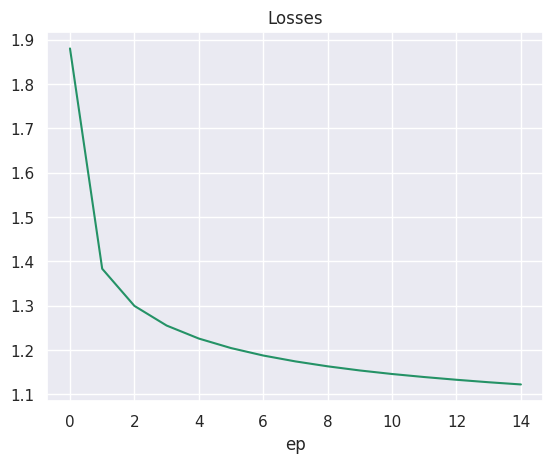

In [ ]:
plt.plot(np.arange(len(losses)), losses)
plt.title('Losses')
plt.xlabel('ep')
plt.show()

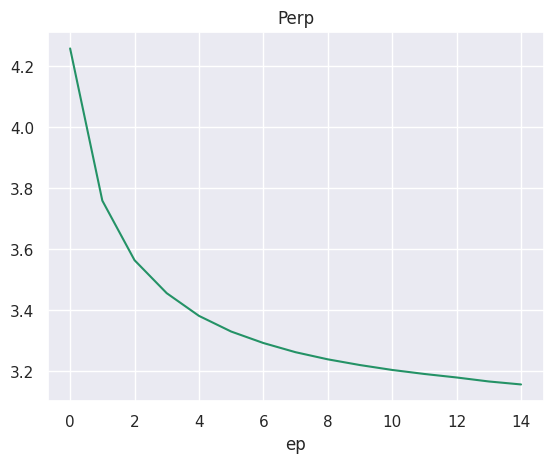

In [ ]:
plt.plot(np.arange(len(perplexities)), perplexities)
plt.title("Perp")
plt.xlabel('ep')
plt.show()

In [ ]:
def generate(model, start_s, max_s_len):
  device = 'cpu'
  model.to(device)
  input_ids = [c2id['<bos>']] + [c2id.get(c, c2id['<unk>']) for c in start_s]
  input_ids = torch.LongTensor(input_ids).to(device)

  model.eval()
  with torch.no_grad():
    for i in range(max_s_len):
      next_c_dist = model(input_ids)[-1]
      next_c = next_c_dist.squeeze().argmax()
      input_ids = torch.cat([input_ids, next_c.unsqueeze(0)])

      if next_c.item() == c2id['<eos>']:
        break
  words = ''.join([id2c[id_.item()] for id_ in input_ids])
  return words

In [ ]:
generate(model, start_s='потерпевший', max_s_len=128)

'<bos>потерпевший в своем твиттере прошлого года в своем твиттере прошлого года в своем твиттере прошлого года в своем твиттере прошлого года в с'

1960-2010 Донейросетая эпоха

2013 Vord2Vec

2014 Seq2Seq RNN

2017 Transformers

2018 BERT, GPT

2019 GPT-3, Megatron-LM

2023 GPT-4

## Byte-pair-encoding

алфавит из одиночных символов; вш; вшэ; ма; па

In [ ]:
import pandas as pd
from tqdm.auto import tqdm

import torch
import torch.nn as nn

from torch.utils.data import DataLoader
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(palette='summer')

In [ ]:
!pip install datasets

In [ ]:
!pip install transformers

In [ ]:
!pip install evaluate

In [ ]:
from transformers import (
    BertForSequenceClassification,
    BertTokenizerFast,
    DataCollatorWithPadding,
    get_scheduler
)

import datasets
import evaluate

In [ ]:
device = 'cuda' if torch.cuda.is_available() else False
device

'cuda'

In [ ]:
data = datasets.load_dataset('glue', 'rte')
metric = evaluate.load('glue', 'rte')

Generating train split:   0%|          | 0/2490 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/277 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/3000 [00:00<?, ? examples/s]

In [ ]:
data

DatasetDict({
    train: Dataset({
        features: ['sentence1', 'sentence2', 'label', 'idx'],
        num_rows: 2490
    })
    validation: Dataset({
        features: ['sentence1', 'sentence2', 'label', 'idx'],
        num_rows: 277
    })
    test: Dataset({
        features: ['sentence1', 'sentence2', 'label', 'idx'],
        num_rows: 3000
    })
})

In [ ]:
metric

EvaluationModule(name: "glue", module_type: "metric", features: {'predictions': Value(dtype='int64', id=None), 'references': Value(dtype='int64', id=None)}, usage: """
Compute GLUE evaluation metric associated to each GLUE dataset.
Args:
    predictions: list of predictions to score.
        Each translation should be tokenized into a list of tokens.
    references: list of lists of references for each translation.
        Each reference should be tokenized into a list of tokens.
Returns: depending on the GLUE subset, one or several of:
    "accuracy": Accuracy
    "f1": F1 score
    "pearson": Pearson Correlation
    "spearmanr": Spearman Correlation
    "matthews_correlation": Matthew Correlation
Examples:

    >>> glue_metric = evaluate.load('glue', 'sst2')  # 'sst2' or any of ["mnli", "mnli_mismatched", "mnli_matched", "qnli", "rte", "wnli", "hans"]
    >>> references = [0, 1]
    >>> predictions = [0, 1]
    >>> results = glue_metric.compute(predictions=predictions, references=ref

In [ ]:
model_name = 'bert-base-uncased'

In [ ]:
tokenizer = BertTokenizerFast.from_pretrained(model_name)

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [ ]:
def get_token(text):
  res = tokenizer(
      text['sentence1'], text['sentence2'],
      padding=False, max_length=512, truncation=True)
  if "label" in text:
    res["labels"] = text["label"]
  return res

In [ ]:
ready_data = data.map(
    get_token,
    remove_columns=data["train"].column_names
)

Map:   0%|          | 0/2490 [00:00<?, ? examples/s]

Map:   0%|          | 0/277 [00:00<?, ? examples/s]

Map:   0%|          | 0/3000 [00:00<?, ? examples/s]

In [ ]:
data_collator = DataCollatorWithPadding(tokenizer)

In [ ]:
batch_size = 64

train_dataloader = DataLoader(
    ready_data['train'],
    shuffle=True,
    collate_fn=data_collator,
    batch_size=batch_size
)

eval_dataloader = DataLoader(
    ready_data['validation'],
    shuffle=False,
    collate_fn=data_collator,
    batch_size=batch_size
)

In [ ]:
model = BertForSequenceClassification.from_pretrained(model_name).to(device)
optimizer = torch.optim.AdamW(model.parameters(), lr=1e-5)

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
model

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e

In [ ]:
num_ep = 5

lr_scheduler = get_scheduler(
    name="linear",
    optimizer=optimizer,
    num_warmup_steps=len(train_dataloader) // 2,
    num_training_steps=len(train_dataloader) * num_ep,
)

In [ ]:
eval_losses = []
train_losses = []
eval_metr = []
learn_rate = []

for ep in range(num_ep):
  model.train()
  curr_train_loss = []
  for i, batch in enumerate(
      tqdm(train_dataloader, desc=f'Train ep {ep}')):
      batch = {k : v.to(device) for k, v in batch.items()}
      out = model(**batch)
      loss = out.loss

      loss.backward()
      optimizer.step()
      lr_scheduler.step()
      optimizer.zero_grad()

      curr_train_loss.append(loss.item())
      learn_rate.append(lr_scheduler.get_last_lr())
  train_losses.append(sum(curr_train_loss) / len(curr_train_loss))

  model.eval()
  curr_eval_loss = []
  for i, batch in enumerate(eval_dataloader):
    batch = {k : v.to(device) for k, v in batch.items()}
    with torch.no_grad():
      out = model(**batch)
    predict = out.logits.argmax(dim=-1)

    metric.add_batch(
        predictions=predict,
        references=batch['labels'],
    )

    curr_eval_loss.append(out.loss.item())

  eval_metric = metric.compute()
  eval_metr.append(eval_metric['accuracy'])
  eval_losses.append(sum(curr_eval_loss) / len(curr_eval_loss))

Train ep 0:   0%|          | 0/39 [00:00<?, ?it/s]

Train ep 1:   0%|          | 0/39 [00:00<?, ?it/s]

Train ep 2:   0%|          | 0/39 [00:00<?, ?it/s]

Train ep 3:   0%|          | 0/39 [00:00<?, ?it/s]

Train ep 4:   0%|          | 0/39 [00:00<?, ?it/s]

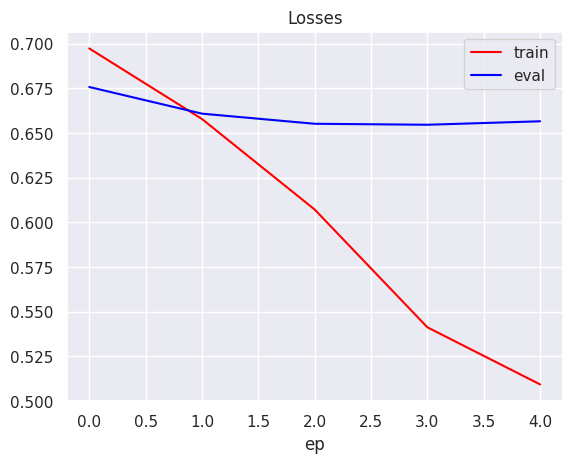

In [ ]:
plt.plot(np.arange(len(train_losses)), train_losses, color='red', label='train')
plt.plot(np.arange(len(eval_losses)), eval_losses, label='eval', color='blue')
plt.title('Losses')
plt.xlabel('ep')
plt.legend()
plt.show()

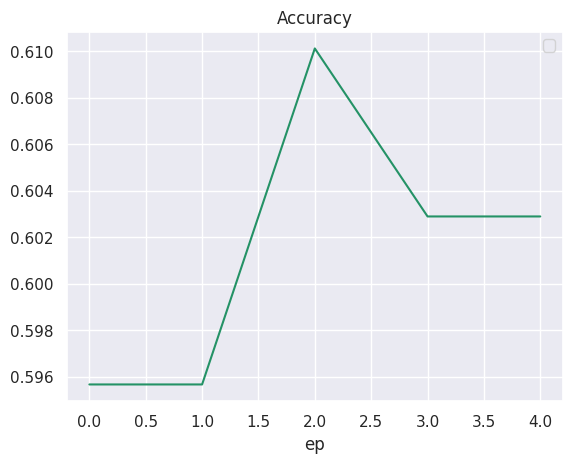

In [ ]:
plt.plot(np.arange(len(eval_metr)), eval_metr)
plt.title('Accuracy')
plt.xlabel('ep')
plt.legend()
plt.show()

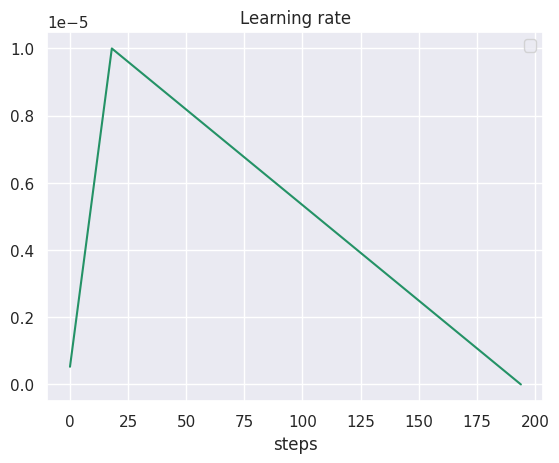

In [ ]:
plt.plot(np.arange(len(learn_rate)), learn_rate)
plt.title('Learning rate')
plt.xlabel('steps')
plt.legend()
plt.show()

In [ ]:
def f(x, a=[1, 2, 3]):
  a.append(x)
  print(*a)

In [ ]:
f(1)
f(2)

1 2 3 1
1 2 3 1 2


In [ ]:
a = [1, 3, 3]
b = a
b.append(1)
print(a)

[1, 3, 3, 1]
